# Plots in 1D

Data visualization is an important skill for an engineer and there are many libraries in Python for doing so. 
We will use the foundation [**Matplotlib**](https://matplotlib.org/) library and specifically the [Pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) package in this course. 

## Summary of commands

In this exercise, we will demonstrate the following:
- [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) - Create Figure and Axes objects for plotting. Many possible parameters.
- [`ax.plot(x, y, ...)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) - Create a scatter/line plot in 1D, `y` vs. `x`. Many styles possible.
- [`ax.set(...)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html) - Set axes `xlabel`, `ylabel`, `xlim`, `ylim`, `title`, etc.
- [`ax.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) - Add a legend to the current figure.

## Making plots with Pyplot

The standard syntax (best practice) for Pyplot is as follows:

```python
import matplotlib.pyplot as plt    # import Pyplot with an alias
fig, ax = plt.subplots()           # create Figure and Axes objects
ax.plot(x, y)                      # or any other plotting function
plt.show()                         # show the figure underneath the code cell
```

Here is an example problem: The displacement of an object falling under the force of gravity is given by

$$ y = \dfrac{1}{2} gt^2 $$

where $g$ is the acceleration due to gravity [units: m s$^{-2}$], $y$ is the distance traveled [m], and $t$ is time [s].
The following table gives the values of $g$ for three different planets:

| Planet   | $g$ [m s$^{-2}$] |
| ------   |  ---: |
| Earth    |  9.80 |
| Jupiter  | 24.79 |
| Mercury  |  3.72 |

## Part 1

Plot the distance fallen as a function of time near the surface of the Earth between $0$ and $10$ seconds, with an increment of $1$ second. 
Add a title and $x$- and $y$-axis labels.

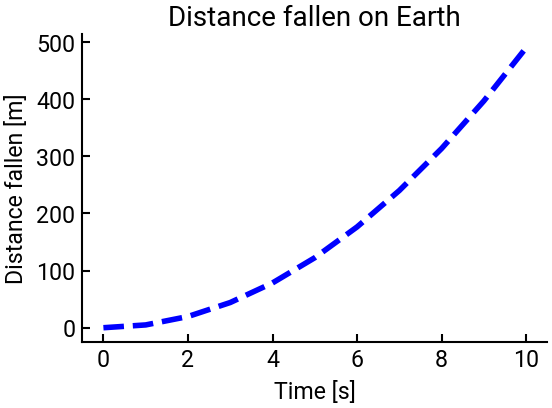

In [1]:
# import all packages
import numpy as np
import matplotlib.pyplot as plt

# calculate the data
t = np.linspace(0, 10, 11)
g = 9.80
y = 0.5 * g * t ** 2

# make the plot
fig, ax = plt.subplots()
ax.plot(t, y, c='b', ls='--')
ax.set(xlabel="Time [s]", ylabel="Distance fallen [m]", 
       title="Distance fallen on Earth")
plt.show()
# fig.savefig("my_figure.png", dpi=300, bbox_inches='tight')   # uncomment to save figure to disk

Notice how in the `ax.plot()` function we added extra _arguments_ that defined the style of the line.
- `c` is shorthand for `color`, which has [many options](https://matplotlib.org/stable/users/explain/colors/colors.html).
- `ls` is shorthand for `linestyle`, which also has [many options](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).
- See [the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) for the function to explore more options.

**Challenge**: What does [`ax.annotate(s, (x,y))`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html) do?
Can you get it to work?

## Part 2

You can plot multiple curves on the same axes directly by calling `ax.plot()` (or another [plotting function](https://matplotlib.org/stable/plot_types/index.html)) multiple times.
In MATLAB you may be used to writing `hold on`, but Python does it automatically!

We'll plot the displacement curve for both Earth and Jupiter in the same figure and add a legend.
Pay attention to the labeling syntax!

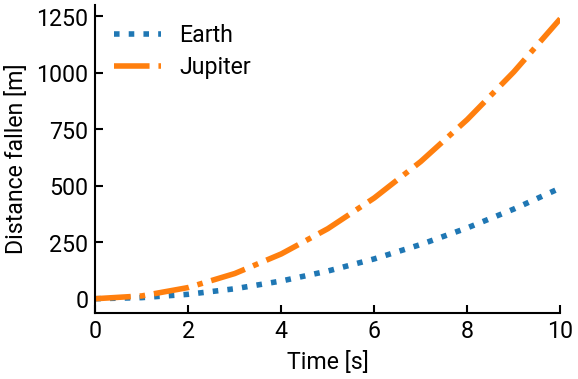

In [2]:
# import all packages
import numpy as np
import matplotlib.pyplot as plt

# calculate the data
t = np.linspace(0, 10, 11)
g_E = 9.80
y_E = 0.5 * g_E * t ** 2
g_J = 24.79
y_J = 0.5 * g_J * t ** 2

# make the plot
fig, ax = plt.subplots()
ax.plot(t, y_E, ls=':', label="Earth")
ax.plot(t, y_J, ls='dashdot', label="Jupiter")
ax.set(xlabel="Time [s]", ylabel="Distance fallen [m]", xlim=[0,10])
ax.legend()
plt.show()

## Part 3

In some cases, we want all of our curves to be in the same figure, but different panels.
To construct multiple sets of axes, we can use the `nrows` and `ncols` parameters of the [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function.
Now the second object that's returned, `axs` below, is an **array** of Axes objects.
To get a specific axis, we can index into the array.
Alternatively, you can use a different format, such as `fig, (ax1, ax2) = plt.subplots(ncols=2)`, to directly store ("unpack") the resulting Axes into two different variables.

We'll demonstrate this by plotting the curves for Earth and Jupiter in the same figure (adjusted to be larger!) on separate axes.

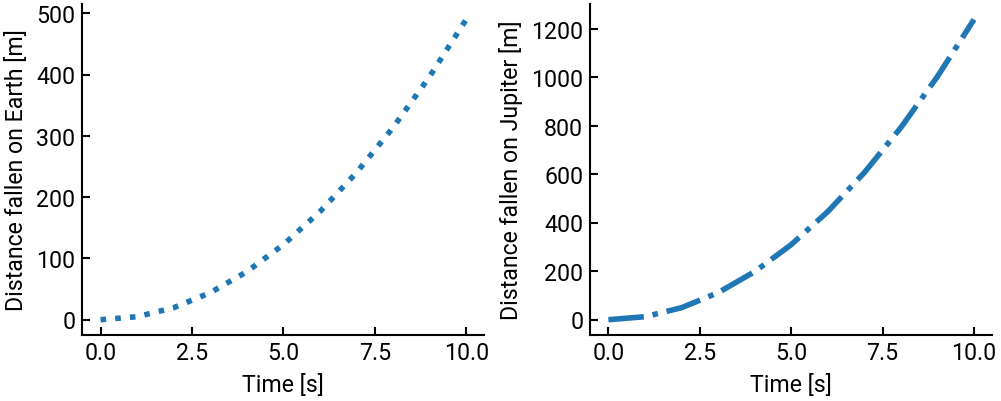

In [9]:
# import all packages
import numpy as np
import matplotlib.pyplot as plt

# calculate the data
t = np.linspace(0, 10, 11)
g_E = 9.80
y_E = 0.5 * g_E * t ** 2
g_J = 24.79
y_J = 0.5 * g_J * t ** 2

# make the plot
fig, axs = plt.subplots(figsize=(10,4), ncols=2, layout="constrained")   # add layout keyword for proper fitting!
axs[0].plot(t, y_E, ls=':', label="Earth")
axs[0].set(xlabel="Time [s]", ylabel="Distance fallen on Earth [m]")
axs[1].plot(t, y_J, ls='dashdot', label="Jupiter")
axs[1].set(xlabel="Time [s]", ylabel="Distance fallen on Jupiter [m]")
# plt.subplots_adjust(wspace=0.3)
plt.show()

In the second to last line, we added some additional padding ([docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)).
You can try to see what happens when you comment out that line.
Also, what if you add `sharey=True` into `plt.subplots()`?